In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as ptc
from scipy.stats import gaussian_kde

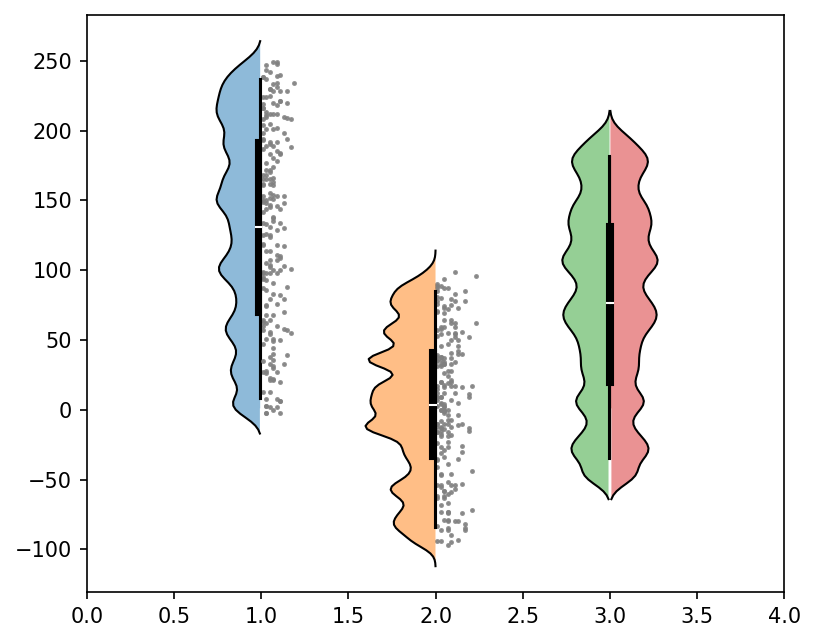

In [21]:
class ViolinHalf:

    def __init__(self):
        pass

    def drawDensity(self,direction,size):
        density = gaussian_kde(self.y,bw_method=0.1)
        density_y = np.linspace(np.min(self.y)-15,np.max(self.y)+15,100)
        density_x = density(density_y)
        if direction == "l":
            for i,x_val in enumerate(density_x):
                density_x[i] = self.x - (x_val*size*10)
        else:
            for i,x_val in enumerate(density_x):
                density_x[i] = self.x + (x_val*size*10)
        ax.plot(density_x,density_y,c="black",lw=1)
        ax.fill_between(density_x,density_y,[1 for _ in range(100)],alpha=0.5)
    
    def drawIndicators(self,direction,size):
        x = self.x
        quantMarkerSize = -0.03*size if direction == "l" else 0.03*size
        vquantMarkerSize = -0.005*size if direction == "l" else 0.005*size
        mean = np.mean(self.y)
        upper = np.quantile(self.y,.75)
        lower = np.quantile(self.y,.25)
        vupper = np.quantile(self.y,.95)
        vlower = np.quantile(self.y,.05)
        meanMarker = ax.plot([x+quantMarkerSize,x],[mean,mean],lw=1,c="white")
        quantMarker = ptc.Polygon([(x+quantMarkerSize,lower),(x+quantMarkerSize,upper),(x,upper),(x,lower)], closed=True,color="black")
        vquantMarker = ptc.Polygon([(x+vquantMarkerSize,vlower),(x+vquantMarkerSize,vupper),(x,vupper),(x,vlower)], closed=True,color="black")
        ax.add_patch(vquantMarker)
        ax.add_patch(quantMarker)

class ViolinScatter(ViolinHalf):

    def __init__(self,y,x):
        self.x = x; self.y = y
        self.x_scatter = self.getXValues(y,x)
        self.drawScatter()
        self.drawDensity("l",5)
        self.drawIndicators("l",1)
        
    def getXValues(self,y,x):
        yDistForMove = (np.max(y) - np.min(y)) / 30
        new_x = []
        y = sorted(y)
        i = 1
        while i<len(y):
            if y[i] - y[i-1] < yDistForMove:
                n = 1
                new_x.append(x)
                if i+n >= len(y): break
                while y[i+n] - y[i-1] < yDistForMove:
                    new_x.append(x+n/50)
                    n += 1
                    if i+n >= len(y): break
                i += n
            else:
                new_x.append(x)
                i += 1
        new_x.append(1)
        for i,x in enumerate(new_x):
            new_x[i] += 0.01
        return new_x

    def drawScatter(self):
        artist = ax.scatter(x=self.x_scatter, y=self.y,s=2,color="grey",alpha=0.8)

class ViolinFull(ViolinHalf):

    def __init__(self,y,x):
        self.x = x; self.y = y
        self.drawDensity("l",5)
        self.drawDensity("r",5)
        self.drawIndicators("l",.7)
        self.drawIndicators("r",.7)
    

class ViolinPlot:

    def __init__(self,data,**kwargs):
        for i,col in enumerate(data):
            print(i,col)


testdata1 = np.random.randint(-2,250,size=200)
testdata2= np.random.randint(-100,100,size=200)
testdata3= np.random.randint(-50,200,size=200)

testdata = {
    "t1":testdata1,
    "t2":testdata2,
    "t3":testdata3
}

fig = plt.figure(dpi=150,figsize=(6,5))
ax = fig.add_subplot()

violin = ViolinScatter(testdata1,1)
violin2 = ViolinScatter(testdata2,2)
violin2 = ViolinFull(testdata3,3)

ax.set_xlim(0,4)

plt.show()